<a href="https://colab.research.google.com/github/SergeyHSE/ALSalgorithm.github.io/blob/main/Gradient/GradientLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1):**


CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s


We can see that the input attributes have a mixture of units.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.base import BaseEstimator
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/content/BostonHousing.csv')
data.head()
X = data.drop(['medv'], axis=1)
y = data['medv']

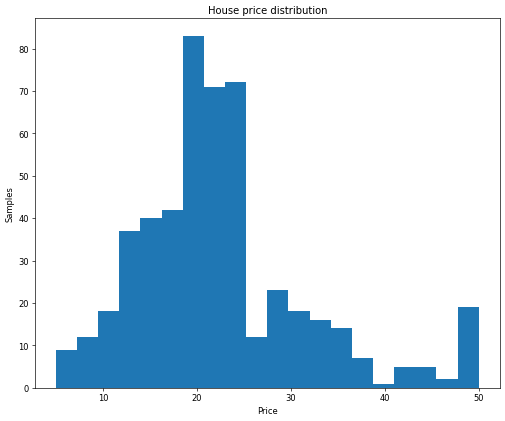

In [4]:
#House prise distribution

plt.figure(figsize=(10, 8), dpi=60)
plt.title('House price distribution')
plt.xlabel('Price')
plt.ylabel('Samples')
plt.hist(y, bins=20)
plt.show()

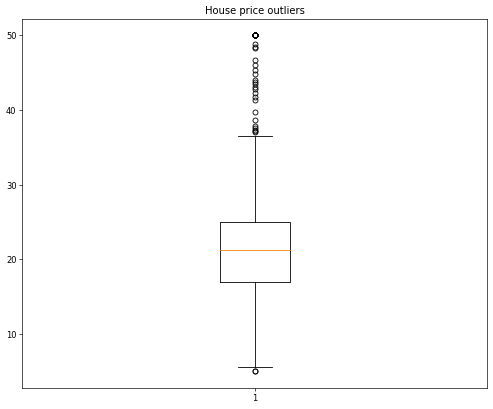

In [6]:
# House price outliers
plt.figure(figsize=(10, 8), dpi=60)
plt.title('House price outliers')
plt.boxplot(y)
plt.show()

In [7]:
# Find the median, quartile, interquartile regions (IQR)

q1 = np.quantile(y, 0.25)
q3 = np.quantile(y, 0.75)
med = np.median(y)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

7.975000000000001 36.962500000000006 5.0624999999999964


Outliers:97     38.7
98     43.8
157    41.3
161    50.0
162    50.0
163    50.0
166    50.0
179    37.2
180    39.8
182    37.9
186    50.0
190    37.0
195    50.0
202    42.3
203    48.5
204    50.0
224    44.8
225    50.0
226    37.6
228    46.7
232    41.7
233    48.3
253    42.8
256    44.0
257    50.0
261    43.1
262    48.8
267    50.0
268    43.5
280    45.4
282    46.0
283    50.0
291    37.3
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
398     5.0
405     5.0
Name: medv, dtype: float64


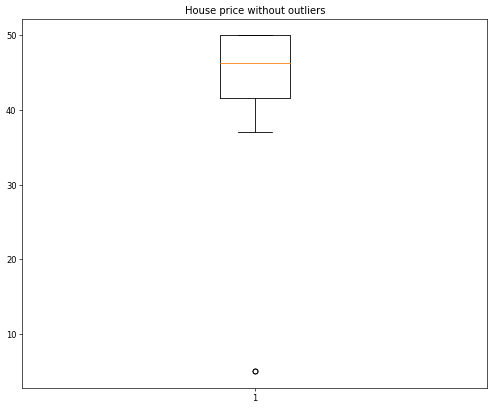

In [9]:
outliers = y[(y <= lower_bound) | (y >= upper_bound)]
print('Outliers:{}'.format(outliers))

y_without_outliers = y[(y <= lower_bound) | (y >= upper_bound)]

plt.figure(figsize=(10, 8), dpi=60)
plt.boxplot(y_without_outliers)
plt.title('House price without outliers')
plt.show()

In [10]:
y.shape
y_without_outliers.shape

(40,)

In [11]:
# Apply z-score method

from scipy import stats

z = np.abs(stats.zscore(y))
data_z_score = y[(z < 3)]
data_z_score.shape

outlier_result_table = pd.DataFrame([[y.shape[0], y_without_outliers.shape[0], data_z_score.shape[0]]],
                                    columns=['Initial data', 'IQR', 'Z-score'])
print(outlier_result_table)

   Initial data  IQR  Z-score
0           506   40      506


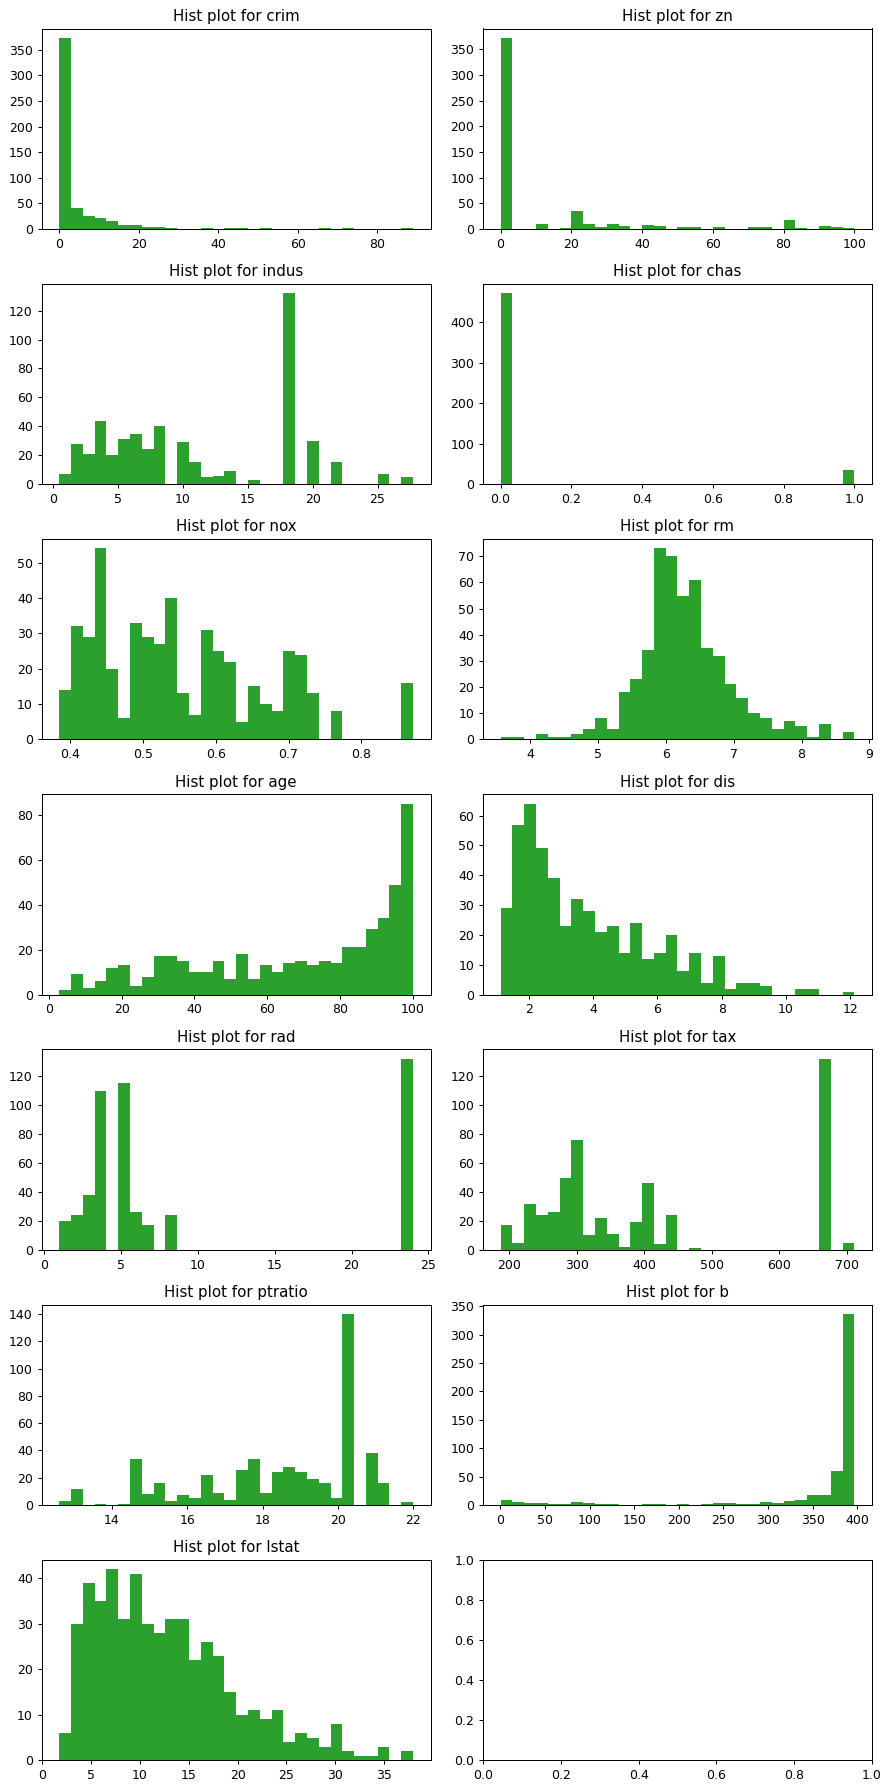

In [13]:
# Build hists for features

feature_names = list(X.columns)
num_rows = 7
num_cols = 2
num_plots = len(feature_names)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 20), dpi=90)
axes = axes.flatten()

for i in range(num_plots):
    if i < num_plots:
        ax = axes[i]
        feature_data = X[feature_names[i]]
        ax.hist(x=feature_data, bins=30, color='tab:green')
        ax.set_title(f'Hist plot for {feature_names[i]}')
    else:
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()